## REFL Assignment 1
Vinodh Chincholi, MDS202252

Question 2(i) Gradient Ascent for Cart-pole

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi, exp, dot

In [2]:
## Initialize constant values as given in question

g = 9.8
mp = 0.1
mc = 10.0
l = 1.0

def sigmoid(par, vec):
    return 1 /(1 + exp(-1*dot(par, vec)))

In [3]:
## Helper function to bound card's linear and angular velocity 

def validate(val, type):
    if type == 'x_dot':
        if val <= -10:
            return -10
        elif val >= 10:
            return 10
        else:
            return val
        
    elif type == 'theta_dot':
        if val <= -1*pi:
            return -1*pi
        elif val >= pi:
            return pi
        else:
            return val

In [4]:
## The cartpole class sets up the environment 
## dynamics function using formulae from paper p:s, a --> s' 
## It also returns policy given parameters as sigmoid of linear function of s

class cartpole:
    
    def __init__(self):
        
        ## the state rep is (pos, vel, theta, ang_vel, time)
        self.x = 0
        self.x_dot = 0
        self.theta = 0
        self.theta_dot = 0
        self.t = 0
        
    def getCurState(self):
        return np.array([self.x, self.x_dot, self.theta, self.theta_dot, self.t])
    
    def getNewState(self, F):
        
        ## Using equations from paper, update state and time
        
        x, x_dot, theta, theta_dot, t = self.x, self.x_dot, self.theta, self.theta_dot, self.t
        
        expr1 = (-1*F - mp*l*(theta_dot**2)*sin(theta))
        theta_doubledot = (g*sin(theta) + cos(theta)*expr1)/(l*(4/3 - mp*(cos(theta)**2)/(mc + mp)))
        
        x_doubledot = (F + mp*l*((theta_dot**2)*sin(theta) - theta_doubledot*cos(theta)))/(mc+mp)
        
        self.theta_dot = validate(theta_dot + 0.02*theta_doubledot, 'theta_dot')
        self.x_dot = validate(x_dot + 0.02*x_doubledot, 'x_dot')
        
        self.theta = self.theta + 0.02*self.theta_dot
        self.x = x + 0.02*self.x_dot
        self.t = t + 0.02
        
        return
    
    def getAction(self, par):
        prob_right = sigmoid(par, self.getCurState())
        
        ## Returns deterministic thresholded action
        if prob_right > 0.5:
            return 10
        else:
            return -10

        
    def legal(self):
        ## Check if cart is out of boundary
        if self.x <= -3 or self.x >= 3:
            return False
        
        ## Check if the pole has fallen or not
        elif self.theta <= -5*pi/12 or self.theta >= 5*pi/12:
            return False
        
        ## Check if time is greater than 20s
        elif self.t >= 20:
            return False
        
        return True

In [5]:
## Sample cartpole dynamics

cart = cartpole()
print(cart.getCurState())
cart.getNewState(10.0)
print(cart.getCurState())

cart.legal()

[0 0 0 0 0]
[ 0.00042596  0.02129824 -0.00302244 -0.15112219  0.02      ]


True

In [6]:
# def eval_policy(par, tot_eps):
#     G_list = []
#     for _ in range(tot_eps):
#         cart = cartpole()
#         reward = 0
#         while cart.legal():
#             f = cart.getAction(par = par)
#             cart.getNewState(f)
#             reward = reward + 1
            
#         G_list.append(reward)
        
#     return (np.mean(G_list), np.std(G_list))

In [13]:
## Reusing function from grid world
## We don't need to repeat tot_eps times since dynamics are deterministic

def eval_policy(par, tot_eps):

    cart = cartpole()
    reward = 0
    while cart.legal():
        f = cart.getAction(par = par)
        cart.getNewState(f)
        reward = reward + 1

    return (reward, 0)

In [8]:
N = 50
SIGMA = 1

param = np.random.normal(0, SIGMA, (5))
G_list = []

In [9]:
## The rewards begin with 10 at time 0
## Therefore the best value is 1001

G = eval_policy(param, N)

for i in range(300):
    SIGMA = SIGMA * 1/(1 + 0.001*i)
    candParam = np.random.normal(param, SIGMA)
    candG = eval_policy(candParam, N)
    if candG[0] > G[0]:
        param = candParam.copy()
        G = candG
    print(f'{i+1}) cand: {candG[0]} best: {G[0]}', end='\r')
    G_list.append(candG)

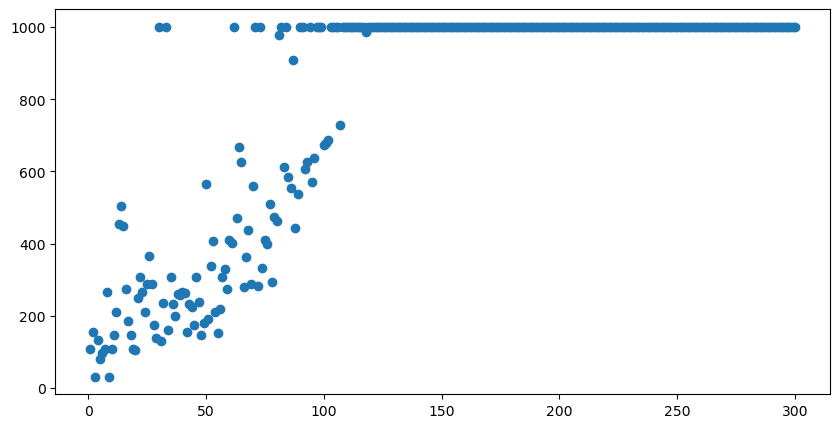

In [10]:
trial = [j+1 for j in range(len(G_list))]
mean, std = [tup[0] for tup in G_list], [tup[1] for tup in G_list]

fig = plt.figure(figsize=(10,5))
plt.errorbar(x=trial, y=mean,
             yerr=std, fmt='o')
plt.show()

In [12]:
## The final parameter yields best reward

cart = cartpole()
reward = 0
while cart.legal():
    f = cart.getAction(par = param)
    cart.getNewState(f)
    reward = reward + 1
    
print(reward)

1001
